In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import defaultdict
import json

In [99]:
data = json.load(open("proc.final")) #'{"size": {"DB=25, SSG+SPJ": {"3": [0.8881086142322097, 0.8880617977528089, 0.882443820224719], "7": [0.8745690364057712, 0.8730206075104034, 0.8701764222172386], "2": [0.8511542364282089, 0.8455733130390666, 0.8475393201420598], "11": [0.869208299790824, 0.8661404938103967, 0.8638334157751634], "8": [0.8449619632799356, 0.834750566893424, 0.8367218930582987], "0": [1.0, 1.0, 1.0], "4": [0.8856152669007111, 0.8690296156269691, 0.8808443604284814], "13": [0.8053038388879703, 0.7803693570451437, 0.8076326774001193], "5": [0.8827216781117491, 0.8836279034860595, 0.8742785845622725], "14": [0.927264239028945, 0.9474251238957122, 0.9458916900093371], "10": [0.8835335090974189, 0.8561544554025758, 0.8869587388384381], "1": [0.9577080491132333, 0.9577080491132333, 0.9565143246930423], "6": [0.8760213120213121, 0.8523569763569764, 0.8637855477855478], "9": [0.8452067256415082, 0.8282953761214631, 0.8368247694334651], "12": [0.8458712928862182, 0.8282096013439297, 0.862040447115074], "15": [0.984375, 0.984375, 0.984375], "16": [1.0, 1.0, 1.0], "19": [1.0, 1.0, 1.0], "20": [0.875, 0.875, 0.875], "18": [1.0, 1.0, 1.0], "17": [0.8175213675213675, 0.8277777777777777, 0.8214896214896216]}, "DB=100, SSG+SPJ": {"4": [0.8884166280718004, 0.884975369458128, 0.8851858869100248], "31": [0.8826180411865227, 0.8781940685082397, 0.8813753363991758], "29": [0.8414593573478045, 0.8609880187091665, 0.8531619227241992], "10": [0.864728462100389, 0.8563783240464183, 0.8623463687775292], "39": [0.9249994791533253, 0.9273655002290239, 0.9194908039205122], "30": [0.8355237008940957, 0.832158533857895, 0.8370273858788283], "1": [0.9570333479810555, 0.9576680826131536, 0.9591328548410722], "26": [0.8783362810568331, 0.8734548151947822, 0.8837100324593452], "11": [0.8556998049276232, 0.8192326440680086, 0.8446821971610483], "3": [0.8737841043890865, 0.8627125345986556, 0.8639086595492289], "16": [0.8467540957030378, 0.8513837090792116, 0.8462379704785592], "7": [0.8897185073980655, 0.8682057148907978, 0.8668344649007632], "46": [0.8757254901960784, 0.8973216374269005, 0.8840937965829607], "35": [0.9243995978016778, 0.9208910846995604, 0.9251648528510685], "21": [0.8767195709645528, 0.8815180582299588, 0.8811189824055522], "6": [0.900247890795336, 0.8857334028501912, 0.8839698865611274], "15": [0.8896728741088307, 0.8786056721681298, 0.8764805676744845], "22": [0.8457966209976323, 0.8535743108573656, 0.8525811387711796], "19": [0.8560380701698115, 0.8519928387477494, 0.8536389792394984], "20": [0.898983647255293, 0.9004898630047342, 0.8999488282518687], "32": [0.8824664339597728, 0.8886969181712374, 0.884997362640696], "27": [0.881090499706, 0.8857519432076212, 0.8697952895306712], "12": [0.8650804383787656, 0.8347588667590562, 0.8544074054097843], "2": [0.7599841587460396, 0.7545230948807736, 0.7630065032516258], "5": [0.8859139305387904, 0.8678314903958801, 0.8790243662024179], "33": [0.8575069520009574, 0.8818545593706364, 0.8764292275852247], "36": [0.9023217732112389, 0.9281344110313148, 0.9022377633955367], "41": [0.9023570554016405, 0.8901530204298242, 0.8857035472691982], "24": [0.8665654591451982, 0.8614560401320303, 0.8621714794796916], "60": [0.9827746924521118, 0.9732873726199645, 0.9735581025903607], "42": [0.8127670740832632, 0.9151229722658294, 0.8316272848342303], "18": [0.894611739684107, 0.8867564993702901, 0.8862192691218187], "28": [0.8511746097523885, 0.8561140280802466, 0.8428100050612848], "47": [0.9224484665661136, 0.9224484665661136, 0.9160382101558572], "40": [0.8505069327500867, 0.8599540437775732, 0.8587072295895826], "8": [0.8784647285680343, 0.87064057957653, 0.8792032462487007], "25": [0.9144060386463689, 0.9099828862603428, 0.9163844270538954], "14": [0.8945398826801138, 0.8835942505305839, 0.8836819984000848], "45": [0.8839557731694826, 0.8511515403652499, 0.8588248012404812], "9": [0.8657111962506661, 0.8450123917702399, 0.8637104446232761], "37": [0.8786310111691681, 0.869762868220809, 0.886876984394148], "17": [0.8663858561211354, 0.8736605297371255, 0.85999501405997], "34": [0.9069165633004269, 0.9083497674692795, 0.9018446714549703], "44": [0.8803252032520326, 0.9044444444444444, 0.8632360911844411], "23": [0.8762750237282181, 0.8698282761334805, 0.864442531717846], "54": [0.7846948258712965, 0.7949531949531949, 0.7905575905575906], "59": [0.9316586151368761, 0.9316586151368761, 0.9249919484702094], "13": [0.8511983385639652, 0.8388303589164459, 0.8385020494481364], "38": [0.7813110924683393, 0.8050595620767834, 0.807301554833482], "43": [0.8815432618064196, 0.8941486113682909, 0.8772610832679483], "0": [0.9941348973607038, 0.9912023460410557, 0.9882697947214076], "55": [0.9366066681856156, 0.9295891243259665, 0.9256018834966203], "56": [0.9659902597402596, 0.9659902597402599, 0.9659902597402596], "50": [0.8935616931514764, 0.898927854767638, 0.8911963732861565], "57": [0.9196428571428572, 0.9404761904761905, 0.9196428571428572], "62": [0.9761904761904762, 1.0, 0.987012987012987], "48": [0.9755626388486429, 0.9167391094368781, 0.9634244502398659], "51": [0.8309409340659341, 0.8216046945885656, 0.8271980817356612], "58": [0.8554146112285648, 0.857331074722379, 0.875713658322354], "49": [0.8710665552770815, 0.8216838392276988, 0.8255304928989139], "71": [0.8000000000000002, 0.8000000000000002, 0.8000000000000002], "53": [0.7247368421052631, 0.7313227513227514, 0.7186521860206071], "61": [0.9058174800110285, 0.9058174800110285, 0.896318018898664], "52": [0.9001906318082789, 0.9008345632159674, 0.899727668845316], "67": [0.9333333333333335, 0.9333333333333335, 0.9333333333333335], "70": [1.0, 1.0, 1.0], "68": [1.0, 1.0, 1.0], "74": [1.0, 1.0, 1.0], "65": [1.0, 1.0, 1.0], "73": [0.41666666666666663, 0.5666666666666667, 0.5833333333333333], "66": [1.0, 1.0, 1.0], "63": [1.0, 1.0, 1.0]}, "DB=250, SSG+SPJ": {"19": [0.843787956373341, 0.7960721705724579, 0.815791508930133], "84": [0.8264216580006053, 0.8549489799489799, 0.8765156350002085], "91": [0.852296181630547, 0.8753353973168215, 0.8520510835913313], "2": [0.7669169313697181, 0.774833958995091, 0.7744369044181346], "90": [0.8243984962406016, 0.8187374277493443, 0.8303810402015822], "24": [0.821050660919373, 0.7992392489199978, 0.7949289688539549], "16": [0.8060720173417032, 0.7636707279330968, 0.7948868068060456], "87": [0.8460718926049204, 0.8485785216535509, 0.8588839057357872], "26": [0.8388460609846832, 0.8238246845040358, 0.8067014926693395], "7": [0.8539875624380501, 0.8216925202515222, 0.8441749072202562], "8": [0.8220201459111862, 0.8204979826415313, 0.8175080593546281], "55": [0.8486450174242255, 0.8938529621469831, 0.876256497166213], "9": [0.7985842400765365, 0.7897351646447998, 0.7764304349026887], "63": [0.8905185777787578, 0.8756258104187946, 0.8968070976906289], "1": [0.9598588559906611, 0.9613379496975486, 0.9615767271569564], "93": [0.8930803571428572, 0.8953869047619047, 0.9279761904761905], "89": [0.9351839826839827, 0.968517316017316, 0.9572619047619048], "33": [0.8273639261912032, 0.8136031247942968, 0.8268356877489023], "22": [0.8595188080765207, 0.8509565272869661, 0.8481400325976816], "12": [0.8087005173892216, 0.7894530669380176, 0.8103240021158418], "47": [0.826453012284916, 0.7961934574175484, 0.7952997476198872], "67": [0.9176147745644975, 0.9135059285853725, 0.9136163626729664], "62": [0.8622045638058694, 0.8537989318005416, 0.8519172288755835], "42": [0.7852460095066063, 0.7946101977896781, 0.7816239418892107], "37": [0.8098811027853335, 0.8435159397280844, 0.8556023401979505], "15": [0.79986343067511, 0.7720121464505111, 0.7847955297992611], "77": [0.9063944350699944, 0.8964618145951819, 0.8983597387375581], "108": [0.6766884531590415, 0.6930909090909091, 0.6982857142857142], "54": [0.8982664781315084, 0.9142653251018438, 0.9123820432339156], "43": [0.8544624460876752, 0.8443415728369672, 0.8525120408195984], "32": [0.8142435724412121, 0.7958210403381863, 0.7987464797961346], "99": [1.0, 1.0, 1.0], "13": [0.8014004388735598, 0.7734451977850341, 0.7839730926788012], "49": [0.8325880537155184, 0.8294294366535155, 0.8088146925552263], "72": [0.8415586648707216, 0.8316593469019747, 0.8490199794026837], "10": [0.798955013652833, 0.7925323933929277, 0.7944387886786871], "44": [0.7759637290538228, 0.7987158305953403, 0.8203890624431326], "79": [0.8816893956976362, 0.8713442139934149, 0.9190998450912896], "6": [0.8253814944943094, 0.8126214815973852, 0.8031107507558768], "83": [0.9100160277277027, 0.903157785144355, 0.9088647964792733], "57": [0.8734550113100547, 0.8775984374897724, 0.8536673464881734], "31": [0.8592112023037962, 0.8558820287952276, 0.8589695135256346], "59": [0.8365767934319887, 0.8129778259232576, 0.7897939525124732], "34": [0.8389758622937731, 0.8081321214975831, 0.8164735837533103], "74": [0.8750716283648836, 0.9232822898838157, 0.8857807438108412], "76": [0.9145672732501395, 0.9225350933072133, 0.9236521484000083], "61": [0.9105335745788964, 0.8922980633201293, 0.8898352656724835], "4": [0.911984126984127, 0.9041405895691608, 0.9106552600838315], "70": [0.8912886068353841, 0.8879614271998671, 0.8881536390329342], "3": [0.846008107884504, 0.8501282369487881, 0.849262489806049], "85": [0.8740775684611065, 0.8740489643421135, 0.8774226541820593], "45": [0.7746368794432124, 0.7951303627224195, 0.7983582156995218], "23": [0.8072773004133865, 0.8043903210421113, 0.7702380290668133], "78": [0.9169419606081713, 0.8996075093732674, 0.9041572870428856], "20": [0.8279831688241842, 0.7952595308064284, 0.8004231671543331], "102": [1.0, 1.0, 1.0], "27": [0.8407341363587225, 0.8000495687556259, 0.7723331786158893], "64": [0.9090138618003262, 0.8856669472576694, 0.9057679560920003], "88": [0.9066934360146027, 0.9047678246565506, 0.9217397061103918], "92": [0.9816207184628237, 0.9816207184628237, 0.9657477025898079], "39": [0.7750387553567624, 0.7901199899041911, 0.7795423677504315], "29": [0.8003845032092421, 0.7862495847368445, 0.7838352287243209], "80": [0.9084078281148432, 0.9286884189836692, 0.9001169904122408], "21": [0.8139616804886185, 0.8313850006905846, 0.8215011604389887], "73": [0.8727308847826606, 0.8944663507136009, 0.8938719809855169], "35": [0.776371105048079, 0.8139135151541637, 0.767754908824411], "104": [0.9872448979591837, 0.9895833333333333, 0.9872448979591837], "38": [0.8020666409359295, 0.8191107774931838, 0.8089739892441832], "53": [0.9020291056086853, 0.8964695197751426, 0.8944245465925221], "30": [0.8493398890793054, 0.8391576933766625, 0.8555942490810198], "68": [0.9277869850292186, 0.9243021523251653, 0.9176699505147666], "46": [0.8572705920575289, 0.8394136017069864, 0.8503135649982942], "14": [0.7954293696413376, 0.7777420947697057, 0.7941788157385358], "18": [0.8023261950566113, 0.7620409979400138, 0.7871587366814979], "11": [0.8085674320610661, 0.799339397158289, 0.813556515691217], "60": [0.8121796649416895, 0.8685066053495863, 0.8641983933476409], "107": [1.0, 1.0, 1.0], "106": [1.0, 1.0, 1.0], "56": [0.8682984323871032, 0.8675114419173997, 0.8535727473591667], "41": [0.8907134237068756, 0.8848661755731702, 0.881005443674222], "5": [0.8825871365299441, 0.8739733307324296, 0.872989176238743], "28": [0.8043327484057461, 0.8706172669026588, 0.823292996319638], "66": [0.8526487751099413, 0.7974961796850796, 0.8319404709323691], "75": [0.8043403137742761, 0.7926345846157167, 0.7945292267850536], "40": [0.8185654182400348, 0.8091369942899965, 0.8059769838424399], "17": [0.8294864315785664, 0.7913828495491532, 0.7946598277091931], "81": [0.9650587415372361, 0.9572161733654937, 0.9571733821733822], "0": [0.9944649446494465, 0.9935424354243543, 0.9935424354243543], "86": [0.8852030104971281, 0.8837744390685567, 0.8852030104971281], "58": [0.9272570007822348, 0.9106158161922018, 0.9131374167514927], "51": [0.8536128029078409, 0.8345843460950954, 0.8325821034123783], "36": [0.8576745253242949, 0.804916611884478, 0.8483186073336327], "69": [0.9263246896677744, 0.922156856057432, 0.9299693995842613], "82": [0.8860298198533493, 0.938405912982184, 0.8907647907647908], "96": [0.9950413223140496, 0.9950413223140496, 0.9950413223140496], "25": [0.7770239455265437, 0.7753060709638063, 0.7744628085260657], "50": [0.7737498694011997, 0.7733029770645508, 0.7728029924048343], "100": [0.9406494960806271, 0.9444813119755912, 0.9430778032036613], "109": [1.0, 1.0, 1.0], "65": [0.8942528289704368, 0.9057049334782732, 0.9039740315697907], "95": [1.0, 1.0, 1.0], "94": [0.9682214948172394, 0.9682214948172394, 0.9682214948172395], "97": [1.0, 1.0, 0.8571428571428571], "98": [0.9041322314049587, 0.9950413223140496, 0.9041322314049587], "52": [0.864255091776447, 0.8486154940118497, 0.8255503219715965], "71": [0.8561101898617669, 0.8774203957528689, 0.8610064292754245], "48": [0.7871570539220974, 0.7683227536678877, 0.8021560033837698], "103": [0.9615384615384616, 0.9629120879120879, 0.9615384615384616], "101": [0.9666666666666666, 0.9666666666666666, 0.9666666666666666], "121": [1.0, 1.0, 1.0], "131": [0.9125615763546798, 0.9285714285714286, 0.9285714285714286], "105": [0.9444444444444443, 0.9444444444444443, 0.9444444444444443], "113": [1.0, 1.0, 1.0], "135": [1.0, 1.0, 1.0], "137": [0.9642857142857143, 0.9642857142857143, 0.9642857142857143], "132": [0.896551724137931, 0.9285714285714286, 0.9285714285714286], "116": [1.0, 1.0, 0.9941520467836257], "111": [1.0, 1.0, 1.0], "120": [0.8728070175438597, 0.8706896551724138, 0.8940677966101696], "110": [1.0, 1.0, 1.0], "122": [1.0, 0.9956140350877193, 0.9956140350877193], "118": [1.0, 1.0, 1.0], "115": [1.0, 1.0, 1.0], "123": [1.0, 1.0, 1.0], "117": [0.0, 0.0, 0.0], "119": [0.4912280701754387, 0.48275862068965514, 0.576271186440678], "112": [1.0, 1.0, 1.0]}, "DB=1000, SSG+SPJ": {"299": [0.9876106194690266, 0.9876106194690266, 0.9859649122807017], "119": [0.9216286680484347, 0.9211983200610887, 0.9269376568124796], "216": [0.770365259868621, 0.6947226006091303, 0.7792540491172666], "238": [0.7916398627846368, 0.79040857638602, 0.7927526903138863], "274": [0.7652173913043478, 0.7643892339544515, 0.7710285293188756], "233": [0.8186863896516602, 0.9066682617244415, 0.9009891642431921], "19": [0.7409860413036945, 0.6968965908213205, 0.7494973863741665], "188": [0.8745925667299372, 0.8825788903749924, 0.8888117448533451], "72": [0.8644447921556356, 0.7744859307359306, 0.8626294032434725], "8": [0.679530699354488, 0.7117087024576011, 0.7009231427733631], "59": [0.7599824005371248, 0.743844593906517, 0.712952416989878], "229": [0.8620958267330311, 0.7632472517571408, 0.821119550543891], "168": [0.8528970854989665, 0.8530482888587259, 0.7903698917139894], "246": [0.8503854731208843, 0.7810506185648645, 0.8487030641429453], "240": [0.7822392988669199, 0.8597946036790988, 0.8284392219278388], "41": [0.9021228516584707, 0.9226882255659362, 0.8802875201232592], "226": [0.7825960556642009, 0.7780217172801016, 0.7527647864068368], "9": [0.7078310672543339, 0.7481487713002666, 0.7162414191497333], "15": [0.7351125486864925, 0.7811876848342065, 0.7987777506394399], "10": [0.7013319953920559, 0.7170365198191941, 0.6953208658505887], "28": [0.6690884225038767, 0.6982152834671964, 0.6647736661607663], "176": [0.7540175294371902, 0.7777384651998978, 0.738781053626854], "131": [0.9234762421611817, 0.8912313442019981, 0.9188708931722711], "270": [0.8937208589427782, 0.8961692877069964, 0.854679602452214], "12": [0.5601270834585025, 0.6094554438852611, 0.6116545749158718], "234": [0.7255640566326494, 0.7968836892608706, 0.7922361278366934], "5": [0.8365400032066698, 0.850104884827107, 0.8350709475709475], "266": [0.9259842519685039, 0.9291338582677167, 0.923076923076923], "155": [0.736378563964771, 0.7343895619757689, 0.7375396139441083], "224": [0.936906552094522, 0.9415219367099066, 0.942789622052295], "2": [0.8299752810036846, 0.8337997294902291, 0.8309547129331655], "83": [0.6545289677359105, 0.604240016634383, 0.6079580904228792], "259": [0.809628466771324, 0.8163614760972882, 0.8279730299199326], "75": [0.6737540377401913, 0.6352867303523299, 0.5942663172749544], "81": [0.8175079809546794, 0.7778642908407076, 0.7897323780257846], "1": [0.9591199924354651, 0.9612632773347622, 0.9611687206480285], "53": [0.8191870219971383, 0.7380675686190925, 0.7392510005717553], "292": [0.9650032676336434, 0.9666643972017498, 0.9666629711751663], "14": [0.5865310317572642, 0.5807273224064876, 0.6267379695831498], "88": [0.7284167769011534, 0.7609747268337381, 0.7471301164949647], "180": [0.8122960993432258, 0.8132506591153207, 0.8141332856892777], "159": [0.9217739055190013, 0.9221903505294528, 0.9169613501966444], "198": [0.8199838991417938, 0.7756063413384419, 0.773132341022752], "250": [0.9212131878909385, 0.9259354250601611, 0.91960080425093], "67": [0.8116590331449098, 0.8135838417438008, 0.8116590331449098], "249": [0.7741397390474093, 0.7995696511950382, 0.7858220462418364], "277": [0.9207729468599034, 0.9159420289855073, 0.9208404916082992], "77": [0.8383702403017591, 0.8328976034858387, 0.912262682850918], "232": [0.793993993993994, 0.9421732657026775, 0.9373510836653055], "23": [0.6221480253823739, 0.6018430483136022, 0.605773326492554], "157": [0.7107104345971781, 0.8343546235225585, 0.8309085396790041], "42": [0.7061524267774268, 0.6939374195624196, 0.6881583791583792], "179": [0.8541101363722636, 0.9355467382263289, 0.9295198228660865], "174": [0.8207343415947422, 0.8198122744172162, 0.8158488597830699], "31": [0.6743117886037804, 0.6523565891932454, 0.620053677001137], "94": [0.7830743432318368, 0.7861555444945517, 0.7877086547928112], "144": [0.9984532592038206, 0.9984532592038206, 0.9984532592038206], "44": [0.8201871941641762, 0.7644417804268481, 0.7377458177330766], "6": [0.7559984111213619, 0.8029823015478752, 0.7747949834015407], "92": [0.8510673482454778, 0.8626681423628721, 0.8475181165528402], "149": [0.9101162968103674, 0.8071328884854965, 0.8809520322344805], "142": [0.8850824828558679, 0.8888738648814982, 0.8804314089675065], "139": [0.7922201138519924, 0.7973352033660589, 0.8115942028985508], "218": [0.8364146567614813, 0.8411775311618347, 0.8684677212649161], "190": [0.7022829750079038, 0.811994265404413, 0.8251922725758267], "235": [0.8888888888888888, 0.8888888888888888, 0.8888888888888888], "223": [0.8546033355871084, 0.8487197898483064, 0.8597385052837563], "202": [0.83001443001443, 0.8294784580498865, 0.8871726978523095], "129": [0.9508611955420465, 0.9508611955420465, 0.9508611955420465], "7": [0.6923339674491749, 0.703115104728008, 0.6929392931697079], "247": [0.8428225440878778, 0.8442527124931508, 0.8447326528607317], "38": [0.9045033479798156, 0.8034419160533687, 0.8115916729746744], "219": [0.6963298841856717, 0.6631761371734088, 0.6907371638855897], "13": [0.38614629083947427, 0.46547555897051496, 0.5063626462558154], "25": [0.762729545028714, 0.681059221253127, 0.6967540001058006], "263": [0.9606716024646283, 0.8933635485209361, 0.8968350962376883], "200": [0.8851848430163256, 0.8631368691329612, 0.8756217172266737], "212": [0.8198044363292359, 0.8206783651546923, 0.8175249768256256], "171": [0.8550385085045722, 0.8670510385969372, 0.8629683331380272], "69": [0.7809824041416449, 0.7377472875728471, 0.8290598366635997], "18": [0.39465281557759835, 0.4185556840933043, 0.41614648062181603], "0": [0.9887156339762002, 0.9905621665982766, 0.982355354944604], "279": [0.8105326899548356, 0.809861207801872, 0.8134186928408386], "79": [0.6573755811006936, 0.6147924002896153, 0.6688927386878218], "58": [0.7670101819362902, 0.8638549405247563, 0.6223101470587806], "156": [0.729200616683371, 0.7996213928980437, 0.7855449578103879], "56": [0.90125, 0.8759566326530613, 0.8768750000000001], "268": [0.8586273498424557, 0.8412822484323244, 0.8665465779052307], "311": [0.5791353383458646, 0.7774252873563219, 0.7470476190476191], "93": [0.7281198748785801, 0.7247683319596147, 0.7526503541836077], "11": [0.6176157176157177, 0.6485745232267951, 0.6815419755901908], "16": [0.5709605947508294, 0.5625211811495536, 0.6374135751294964], "300": [0.8621671590201161, 0.8965473782552772, 0.8636158206492238], "74": [0.7052959431635902, 0.7291641467192937, 0.7186706610710322], "134": [0.8779186730872125, 0.8710607530028278, 0.8749617102333423], "194": [0.8132609286869183, 0.8067604583377828, 0.8020755349926088], "118": [0.8522994591446966, 0.9056656332005258, 0.9032886932325221], "313": [0.8879148759902655, 0.884423076923077, 0.884258962011771], "45": [0.6896368840714903, 0.6757605077129426, 0.7033539597062377], "138": [0.8757788009404389, 0.8753818624557261, 0.8757788009404389], "89": [0.7097763252013125, 0.7133491406691135, 0.6652457707536288], "220": [0.807549512001577, 0.7839584820311211, 0.7582245669214324], "215": [0.9058005518328734, 0.8683428263065588, 0.8558683266522162], "3": [0.7978324761204996, 0.8439260347783492, 0.8330026940974774], "90": [0.8139453687555501, 0.8171505587679119, 0.8539937964000018], "4": [0.8262542061792597, 0.838891862955032, 0.8409452431936371], "193": [0.7875529618925564, 0.875698511724929, 0.793969396939694], "46": [0.8070125455442161, 0.8055069014916939, 0.7569663559201402], "73": [0.8279571590185792, 0.8302833155090471, 0.8397478577190729], "40": [0.9071243644419082, 0.8765045842704107, 0.7612349895396302], "128": [0.915227657290888, 0.9180039463668165, 0.8992689902408313], "54": [0.7879541508180178, 0.7268442653040248, 0.7400517062240078], "71": [0.7541500295083332, 0.7504917444933925, 0.7637492578757926], "55": [0.7311285632101824, 0.6952750372454759, 0.7301612084342215], "195": [0.9458675813485251, 0.946111163488659, 0.9456637228491171], "228": [0.6407407407407407, 0.6115821059205215, 0.6399553803822414], "254": [0.8921594938779788, 0.8871602718038845, 0.8829144231708307], "204": [0.6425345836502424, 0.6350926232053941, 0.6299512097191126], "152": [0.8812491934443154, 0.8673210804789752, 0.8743386243386243], "148": [0.9077934838565982, 0.8921356953174536, 0.8954491181196682], "162": [0.718164311179017, 0.7243341404358353, 0.7241581323186495], "146": [0.9459356206250616, 0.9663437838903678, 0.9306294981760821], "50": [0.8660553731585864, 0.8651981619163138, 0.8427786948283255], "191": [0.7536820803960808, 0.7494948672521659, 0.7266261771957014], "248": [0.8292208383232724, 0.8255093257040702, 0.8751781581569966], "241": [0.6733185136059017, 0.6618656433011533, 0.6709648845302121], "116": [0.9403384228591196, 0.9402790553734628, 0.9060759145058978], "48": [0.7963705535624619, 0.7373154327830891, 0.8554922823745588], "37": [0.7475089076116881, 0.7531215324523686, 0.7722273785849938], "252": [0.7723518825410954, 0.7673361283711096, 0.773436945900305], "187": [0.8170350998442382, 0.6378511243854972, 0.7533725832439448], "21": [0.5331684251154452, 0.5802821612060435, 0.5755344744263551], "222": [0.8625615020339545, 0.8630641706691206, 0.9193840651789895], "60": [0.8229795337669447, 0.7035872092333607, 0.6433003893819179], "34": [0.8246866939949793, 0.8435478762844492, 0.8375029198341024], "163": [0.6336633663366337, 0.8787128712871287, 0.8872549019607843], "35": [0.7780195829191537, 0.6929394194153013, 0.7224181064468926], "104": [0.8978624339965311, 0.8202834572003329, 0.896609987812578], "66": [0.8712691248201565, 0.79347111215519, 0.738839932135054], "275": [0.9217772777665195, 0.9230972812372463, 0.9257514013083715], "22": [0.34723521545354324, 0.4855658001200637, 0.5329959009510707], "20": [0.6071675810363593, 0.561324547749887, 0.6130013619267013], "135": [0.9277674706246135, 0.9142857142857143, 0.9193515704154], "207": [0.8957209636821287, 0.9007600215227335, 0.893537799300511], "36": [0.8145872350755187, 0.7750037163701144, 0.7069726822122526], "133": [0.9249566572889555, 0.9330686719138601, 0.9276799429957194], "32": [0.8046670907889695, 0.7403973256481191, 0.7818456205787466], "57": [0.8443351968988846, 0.8410322159122205, 0.7817515320879638], "86": [0.7049596180030963, 0.7587823623968203, 0.7033966739849092], "47": [0.7994300447609667, 0.7607550139152526, 0.7991009057495163], "210": [0.8079877112135176, 0.8918597742127155, 0.8944984193075797], "132": [0.9123526694092663, 0.9097897952025565, 0.9090183936640315], "123": [0.9073104378483224, 0.881311688630061, 0.8762009437388285], "80": [0.936277931470239, 0.7346600240388929, 0.7308223778715266], "136": [0.8765854698661023, 0.8832588429896919, 0.8756950606329488], "97": [0.8111202585774064, 0.8152109231441594, 0.8125511582800345], "151": [0.9083664625192508, 0.9112994665328351, 0.9155188758155356], "39": [0.711759735126049, 0.7257913924851208, 0.7248011729028756], "33": [0.6816139929974936, 0.6472417600660122, 0.7380585687321366], "140": [0.9971291866028708, 0.9971291866028708, 0.9971291866028708], "17": [0.6017043688322401, 0.6151792869974649, 0.6515097389590909], "51": [0.7978652336056155, 0.7968919858870123, 0.8008708349417726], "24": [0.6740035539907663, 0.6014562706146059, 0.6531783179952516], "113": [0.8305585072880136, 0.8241045258371991, 0.8341045469912103], "64": [0.8846968704769841, 0.8223125897415263, 0.8845032168537993], "27": [0.7182628297628297, 0.6493680393680392, 0.6547833106795371], "52": [0.9103611805640757, 0.9098834177129178, 0.9103315236086442], "158": [0.886950024495537, 0.8076759035850941, 0.8809381171823568], "227": [0.9225040762573686, 0.9250550966655319, 0.9228765963994461], "308": [0.7483309602910931, 0.7488559059987632, 0.746049034862694], "98": [0.858615309421761, 0.8575208948709482, 0.8625448137968434], "287": [0.9073713651370326, 0.9254873071660182, 0.9073713651370326], "192": [0.5836882887826994, 0.5937801134930832, 0.5941621513078], "376": [1.0, 1.0, 1.0], "391": [1.0, 1.0, 1.0], "339": [0.8205874534821903, 0.7765491960263334, 0.8221053571827337], "201": [0.46646979205118744, 0.4639438796742168, 0.4623524623524624], "273": [0.8970049325036933, 0.8953356443706026, 0.8897571257299763], "150": [0.7899418392517339, 0.7825535507754876, 0.726745767760078], "281": [0.8389610389610389, 0.8329153605015673, 0.8248592115848753], "267": [0.871938167811438, 0.8703538363958098, 0.8737908075363775], "392": [1.0, 1.0, 1.0], "302": [0.7894342409479811, 0.7827313381492949, 0.7728235476771054], "285": [0.804135433300392, 0.8032306422004868, 0.8598810191053855], "331": [0.8695588847274239, 0.8620545073375263, 0.8646714099544287], "230": [0.8509855355197019, 0.8541683350016683, 0.8872927977443954], "245": [0.9456521739130435, 0.9456521739130435, 0.944905905256327], "325": [0.6931524547803618, 0.9407008086253369, 0.9473453268977622], "183": [0.786979183132705, 0.8203656855454851, 0.7517151578537629], "329": [0.8426999463231347, 0.8591240094238595, 0.7298136645962733], "236": [0.6375168690958165, 0.8279377689506786, 0.8364912280701754], "390": [0.75, 0.75, 0.75], "76": [0.6369658119658119, 0.6679292929292929, 0.6336805555555555], "95": [0.8956220700592603, 0.8365566335741648, 0.8395015702425863], "294": [0.9357404500261642, 0.9379359934344518, 0.9375337982270617], "107": [0.8750357633908921, 0.8956100292489846, 0.8863374378979556], "106": [0.8828862206975415, 0.8792362377217159, 0.8797283933032609], "164": [0.5979126237746927, 0.6115987917167085, 0.6156016481597877], "251": [0.7932323232323232, 0.7934941136663283, 0.7818368043700921], "68": [0.8206527827394735, 0.8882432068872747, 0.8316428284752818], "291": [0.8799977350142902, 0.873985199215614, 0.8747577599705258], "297": [0.9408318623600419, 0.9428727301067726, 0.9428582048119162], "225": [0.8950567593359756, 0.8858759326375214, 0.8833220529949165], "99": [0.755787037037037, 0.7530171681115077, 0.7563003809017628], "301": [0.8538436260536633, 0.8774147591538897, 0.8615328544006997], "154": [0.6621002653260717, 0.6575182438723766, 0.6786158294807196], "160": [0.797483930448873, 0.7978650329527522, 0.7003623188405798], "178": [0.7212996952735046, 0.716884543651432, 0.7262912523666581], "147": [0.955730380983393, 0.9513966979027219, 0.9501384533568061], "286": [0.9444444444444443, 0.9444444444444443, 1.0], "341": [0.7222222222222222, 0.7264150943396226, 0.7264150943396226], "282": [0.9738436391714654, 0.9716310096033531, 0.9738439288075318], "303": [0.7719987429289755, 0.7794573229355838, 0.7485914070216396], "374": [1.0, 1.0, 1.0], "307": [0.7675076880067095, 0.7154351395730706, 0.7094845750323321], "323": [0.8539925727115761, 0.8484319465706944, 0.8472926840832583], "289": [0.9980314960629921, 0.9980314960629921, 0.9980314960629921], "328": [0.9655172413793104, 0.9523809523809524, 0.9655172413793104], "214": [1.0, 0.9444444444444443, 1.0], "126": [0.9471039467037898, 0.9495125079129739, 0.9469880742975576], "30": [0.7456935255121822, 0.6541938927539614, 0.7368256609537113], "213": [0.8700379750293692, 0.8700379750293692, 0.8688586545729403], "361": [0.7614035087719299, 0.75, 0.753968253968254], "70": [0.8551283686896628, 0.8050949238504573, 0.8052661286827739], "243": [0.7729301557868924, 0.6559071875828031, 0.7796547127622979], "262": [0.8331782889792125, 0.8281923682695781, 0.8320941076638344], "110": [0.8926370548219286, 0.8880385487528343, 0.8953774280796655], "265": [0.8090565862923587, 0.8041835866972479, 0.8025097814300899], "96": [0.8366996246079575, 0.7915429657809887, 0.8520338453348297], "109": [0.820767266684688, 0.8688278263052639, 0.8164706253724484], "335": [0.8341013824884793, 0.8341013824884793, 0.8341013824884793], "261": [0.8287303665728379, 0.8334331198366285, 0.9451088834483925], "165": [0.7787342196049334, 0.7851564265964028, 0.7843682005989159], "280": [0.9341607692296922, 0.9379271644482013, 0.9382039408385149], "141": [0.8305785123966943, 0.9231711049892868, 0.8490970309152127], "26": [0.6687827191556519, 0.6453883302338751, 0.6269294156842073], "175": [0.9431213788280961, 0.9445436901768779, 0.947512943146131], "105": [0.8117248433704131, 0.8074839111043857, 0.8097271791009435], "177": [0.8742865539829487, 0.8754945394912028, 0.8583516635951093], "182": [0.8037875276088676, 0.8011957442801998, 0.8313944405337896], "125": [0.9213484750162232, 0.9241666666666667, 0.92473371747861], "186": [0.9080621437764295, 0.7413954771097627, 0.7413954771097627], "130": [0.891864941577011, 0.9295077581594435, 0.9309565217391305], "166": [0.8329175525270601, 0.8172885909826101, 0.8255446382412148], "84": [0.7748541517371895, 0.7630980644873326, 0.7732464407645823], "63": [0.8536241104805958, 0.8072799679921913, 0.7724339601976616], "78": [0.8947238989492511, 0.8144032379414688, 0.8160090201945215], "211": [0.8961709493538663, 0.899647834780792, 0.8959694989106755], "127": [0.8806085387157889, 0.894462013045587, 0.8944515095110601], "121": [0.9111178660836922, 0.9050407949749184, 0.9051934480859888], "103": [0.7572578563925402, 0.7838116830700723, 0.7615995611243829], "65": [0.873568984905166, 0.7521140248996475, 0.8648705096073517], "61": [0.8271847200418627, 0.7815348288075561, 0.7529150503176477], "43": [0.8712049720787691, 0.8692976559656493, 0.8697057217039563], "29": [0.7940278657292623, 0.7278298729646865, 0.6667116181330681], "62": [0.8757525998905309, 0.9709906951286261, 0.8783965563626581], "122": [0.7900943396226414, 0.9012054507337527, 0.9012054507337526], "320": [0.9146155799153871, 0.9167039986726399, 0.9130027832978366], "413": [1.0, 1.0, 1.0], "260": [0.9015420938357058, 0.9123970163083767, 0.9084255643510184], "304": [0.8459794508821274, 0.8495447625965523, 0.8495828138120886], "239": [0.7481485905398949, 0.7496732026143791, 0.7407563025210084], "375": [1.0, 1.0, 1.0], "319": [0.8333333333333334, 0.8333333333333334, 0.8333333333333334], "398": [0.5, 0.5, 0.5], "364": [0.8410590042468601, 0.8456590847482689, 0.8464476699770819], "317": [0.9916467384083965, 0.9926016341171782, 0.9914327607875995], "387": [1.0, 1.0, 1.0], "353": [0.9672131147540984, 0.9699453551912569, 0.9674796747967479], "284": [0.6816186336583632, 0.6866850681638204, 0.6962517379435269], "181": [0.6938488702463859, 0.9779223498254834, 0.974159302937977], "102": [0.45436507936507936, 0.4651639344262295, 0.4637096774193548], "115": [0.9092405921837361, 0.9265581638713958, 0.9175040513681053], "352": [0.780952380952381, 0.775609756097561, 0.7853658536585366], "120": [0.9230769230769231, 0.925, 0.9375], "362": [0.9851351351351351, 0.9918478260869565, 0.9891304347826086], "409": [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], "145": [0.8275868725868725, 0.8366279684772835, 0.8298237146921357], "338": [0.6208333333333333, 0.6271186440677966, 0.6228813559322034], "87": [0.599175140665602, 0.5601660726049448, 0.6002618733497656], "332": [0.505430463576159, 0.49986577181208053, 0.497930463576159], "124": [0.7781305962529725, 0.8750604782288534, 0.7743842449082149], "272": [0.9861717290226282, 0.9876733845621701, 0.984392554255568], "312": [0.8145727221279003, 0.8076023391812864, 0.8132465174341079], "343": [0.9454545454545455, 0.7511111111111111, 0.9511111111111111], "309": [0.8148148148148148, 1.0, 0.9629629629629629], "354": [0.4508196721311476, 0.45491803278688525, 0.45121951219512196], "257": [0.8660072846408249, 0.8725991055183602, 0.8727215991830096], "112": [0.8398814191530016, 0.8410411378363343, 0.8436798134761426], "315": [0.9874161073825503, 0.9890939597315436, 0.8633333333333333], "244": [0.8993457625687914, 0.9106993876397099, 0.9015121170247896], "351": [0.9385474860335196, 0.9662921348314607, 0.9550561797752809], "91": [0.7748999900934478, 0.8001004513944435, 0.7695968386219544], "185": [0.7697135158034604, 0.7918079726548956, 0.7946517086550734], "203": [0.9325435860189055, 0.8027283456409471, 0.9236914083102029], "199": [0.8411960671549655, 0.9052350342198735, 0.9053962908893375], "278": [0.8191214470284237, 0.8191214470284237, 0.8217054263565892], "82": [0.7616733525341989, 0.7040556416581207, 0.67638205487923], "400": [1.0, 1.0, 1.0], "205": [0.7257149119716931, 0.8439298043728424, 0.8390470083362107], "288": [0.9067197170645446, 0.9124949124949125, 0.8241758241758242], "137": [0.8127939043101097, 0.8127939043101096, 0.8138550778431933], "324": [0.8181029632408102, 0.8252382697947215, 0.819272899775746], "208": [0.792272118778143, 0.8857064622124861, 0.9127787704321354], "108": [0.8680981236036455, 0.8581227340272304, 0.8881355852803821], "206": [0.7078683705728416, 0.8150403828661222, 0.8070979108738106], "357": [0.9793348115299334, 0.4, 0.9804878048780488], "258": [0.8102272727272728, 0.6798120602119889, 0.8065596330275229], "334": [0.799564560561628, 0.6285296143250688, 0.799564560561628], "378": [1.0, 1.0, 1.0], "169": [0.7994189651708203, 0.7218396000914552, 0.7999281294957741], "401": [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], "290": [0.8720168664360605, 0.8676981138454184, 0.8651470934372552], "355": [0.7647250319730265, 0.7650658046640499, 0.7635863964273446], "209": [0.7757756132756133, 0.7596494723069602, 0.7745640785049651], "269": [0.864165682515307, 0.7832176737457851, 0.7873920526341229], "327": [0.8463054187192119, 0.8421578421578422, 0.8443349753694581], "405": [0.5, 0.5, 0.5], "237": [0.8572248355840322, 0.857667136082404, 0.8698250166144245], "196": [0.7643954630856525, 0.934487998773713, 0.7653867804022604], "264": [0.8294609795446333, 0.7273302658115681, 0.8322509790988726], "349": [0.9818181818181818, 0.6666666666666666, 0.983739837398374], "276": [0.8881027618320287, 0.8904090974716977, 0.8924154493161758], "256": [0.9968253968253968, 0.9968253968253968, 0.9968253968253968], "100": [0.6449090469857389, 0.47996487872252863, 0.6507276741145861], "330": [0.94199676134544, 0.9450394070671747, 0.9477604955025487], "253": [0.6843793515127087, 0.6846096569864792, 0.6792226470292443], "161": [0.8794402594428359, 0.8342190238203414, 0.8285008592925319], "271": [0.7503831890697448, 0.7395192134784834, 0.7442543938519199], "170": [0.840448402948403, 0.589193302891933, 0.7579993786890338], "111": [0.8476543363244572, 0.8490237178383077, 0.8513006544610178], "189": [0.9105393718513989, 0.8870714215541802, 0.8260306360471396], "114": [0.860873382043872, 0.8611631472100416, 0.8636819766951633], "49": [0.965110159118727, 0.9164269902862054, 0.8483470557080264], "316": [0.9829178910392813, 0.9847646358437725, 0.9829178910392813], "345": [0.0, 0.0, 0.0], "346": [0.9285714285714286, 0.9390243902439024, 0.9390243902439024], "347": [0.7143658810325477, 0.7004429678848284, 0.7003083823941688], "85": [0.6789492553695037, 0.5417765122364169, 0.612353732970941], "143": [0.9293246912498905, 0.9315295783372417, 0.9329041487839771], "242": [0.9010329356257488, 0.900434791449514, 0.9003541612998637], "314": [0.6875, 0.6875, 0.6730769230769231], "293": [0.938302936955228, 0.9306998957387415, 0.9374453040221234], "283": [0.4720962080238234, 0.46571953281733935, 0.472760475739717], "296": [0.9750467416622275, 0.9742455024121874, 0.9762718448640619], "153": [0.9283333333333333, 0.859071729957806, 0.9237181946042707], "310": [0.9423868312757202, 0.9979423868312757, 0.9979423868312757], "348": [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], "173": [0.6386486569253157, 0.642663940804271, 0.6498362232302751], "117": [0.974263541336712, 0.9750414194858639, 0.9750414194858639], "298": [0.9898648648648649, 0.9895093062605753, 0.9888324873096448], "255": [0.7994343767039346, 0.6555914560111263, 0.6551154458935257], "184": [0.7871482516395721, 0.6962657873889276, 0.7005513346092266], "101": [0.8981272466420664, 0.8924129391774992, 0.8939985628561461], "306": [0.7402597402597403, 0.9902597402597403, 0.9852941176470588], "197": [0.8682939626238595, 0.8660014005602241, 0.8669128152850345], "371": [0.0, 0.0, 0.0], "372": [0.75, 0.75, 0.75], "231": [0.7768628946232174, 0.7738417358586827, 0.7849386897582721], "369": [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], "367": [0.9481481481481481, 0.9481481481481481, 0.9379310344827587], "167": [0.920979020979021, 0.9164335664335665, 0.9179487179487179], "350": [0.9523809523809524, 0.959349593495935, 0.959349593495935], "321": [0.9886618712376287, 0.989399928135106, 0.9461804664373834], "336": [0.9777755243455187, 0.9798205141205699, 0.9788853053819794], "382": [0.9744897959183674, 0.9763513513513513, 0.9763513513513513], "384": [1.0, 1.0, 1.0], "381": [1.0, 1.0, 1.0], "337": [0.9862258953168044, 0.9862258953168044, 0.9862258953168044], "326": [0.9636337293538105, 0.9537815126050421, 0.9537815126050421], "217": [0.859795656646796, 0.858399299424322, 0.821700418551558], "363": [0.75, 0.75, 0.75], "221": [0.8040875763833919, 0.7850176872618675, 0.7918939403909736], "394": [0.9029977628635346, 0.9066666666666666, 0.9097091722595079], "395": [0.6351351351351351, 0.6351351351351351, 0.63718820861678], "411": [1.0, 1.0, 1.0], "424": [0.5, 0.5, 0.5], "370": [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], "416": [0.0, 0.0, 0.0], "380": [1.0, 1.0, 1.0], "365": [0.9135802469135803, 0.9047619047619048, 0.896551724137931], "396": [0.6351351351351351, 0.6351351351351351, 0.63718820861678], "421": [1.0, 1.0, 1.0], "359": [0.8913712158005503, 0.8851063829787235, 0.8750567923671059], "342": [1.0, 1.0, 1.0], "366": [1.0, 1.0, 1.0], "379": [1.0, 1.0, 1.0], "333": [0.957516339869281, 0.9533333333333333, 0.956953642384106], "295": [0.7459438824203093, 0.7659661293613549, 0.7486559139784946], "373": [1.0, 1.0, 1.0], "305": [0.9799498746867167, 0.9799498746867167, 0.9810231461005454], "172": [0.8669260019012358, 0.8469984656693518, 0.872431946584489], "360": [0.5393258426966292, 0.4883720930232558, 0.5185185185185185], "383": [0.0, 0.0, 0.0], "417": [0.0, 0.0, 0.0], "425": [0.0, 0.0, 0.0], "463": [1.0, 1.0, 1.0], "460": [1.0, 1.0, 1.0], "469": [0.5, 0.5, 0.5], "448": [0.0, 0.0, 0.0], "420": [0.0, 0.0, 0.0], "368": [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], "356": [1.0, 1.0, 1.0], "393": [1.0, 1.0, 1.0], "389": [1.0, 1.0, 1.0], "318": [1.0, 1.0, 1.0], "385": [1.0, 1.0, 1.0]}}, "type": {"DB=25, SSG+SPJ": {"min/max": [0.8789514027824015, 0.8678395098171338, 0.8714424335601286], "count": [0.9008620689655172, 0.9008620689655172, 0.9008620689655172], "bool_complex": [1.0, 1.0, 1.0], "set": [0.8909490625115625, 0.8907754514004513, 0.890254618067118], "set_complex": [0.9593199757134183, 0.9678202792956891, 0.9599271402550091], "min/max_complex": [0.8753753753753752, 0.8858858858858858, 0.8858858858858858], "count_complex": [0.9963031423290203, 0.9963031423290203, 0.9963031423290203], "bool": [0.9980732177263969, 0.9980732177263969, 1.0]}, "DB=100, SSG+SPJ": {"count": [0.9049110085695452, 0.9052406064601186, 0.9042518127883982], "min/max": [0.8578666401950871, 0.8421714461965155, 0.8470061120953338], "set": [0.8792206057795858, 0.8831183952717475, 0.8864798183474525], "set_complex": [0.927710843373494, 0.930388219544846, 0.9360776439089693], "bool": [0.9982281284606866, 0.997563676633444, 0.9984496124031008], "bool_complex": [0.9933333333333333, 0.9888888888888889, 0.9933333333333333], "min/max_complex": [0.6841740584882178, 0.7060533307006049, 0.7007152263928548], "count_complex": [0.9709020368574199, 0.9641125121241513, 0.9728419010669254]}, "DB=250, SSG+SPJ": {"min/max": [0.8131992940940417, 0.799837867683059, 0.8076315033919216], "count": [0.9185267857142857, 0.9199004120879121, 0.9171531593406593], "set": [0.8835475403900882, 0.89018610032313, 0.8871065963206421], "bool": [0.995998499437289, 0.9971239214705515, 0.9973740152557209], "set_complex": [0.9101654846335696, 0.9177642688280986, 0.9162445119891928], "count_complex": [0.9903053805138148, 0.9844886088221038, 0.9873969946679593], "bool_complex": [0.9981464318813716, 0.9972196478220574, 0.9972196478220574], "min/max_complex": [0.695925371485638, 0.6957747950319297, 0.7015839441580654]}, "DB=1000, SSG+SPJ": {"min/max": [0.7690263166558133, 0.7643265947629714, 0.770140608858206], "min/max_complex": [0.6831883045427686, 0.7263860815415758, 0.7105132638957907], "count": [0.920158625247852, 0.9209517514871117, 0.9197620621282221], "count_complex": [0.9795874516544908, 0.9844220025784272, 0.9792651482595617], "set_complex": [0.9075050200803212, 0.9092261904761906, 0.9117290590935169], "bool_complex": [0.9962523422860712, 0.993962107016448, 0.9968769519050593], "set": [0.8780694194132344, 0.8829899635215512, 0.8855391473680992], "bool": [0.994289897510981, 0.9954612005856516, 0.9953147877013178]}}, "bins": {"DB=25, SSG+SPJ": {}, "DB=100, SSG+SPJ": {}, "DB=250, SSG+SPJ": {}, "DB=1000, SSG+SPJ": {}}}')
systems = list(data['size'].keys())
all_system_type = data['type']
all_system_size = data['size']
all_system_bins = data['bins']

DB=25, SSG+SPJ [0.8732174636366382, 0.9979959919839679, 0.9069245864872442, 0.8892196377490494] [0.004207508456530679, 0.0014170476576884472, 0.0, 0.000692963686977542]
DB=100, SSG+SPJ [0.849639670005328, 0.9980424658615519, 0.9006972321994507, 0.8830344718822317] [0.0067747628714691374, 0.0005700677270587376, 0.0004750594254254814, 0.0029422338556865124]
DB=250, SSG+SPJ [0.808146611287564, 0.9975179287949691, 0.9162363155137339, 0.8875930472435174] [0.005991820908325259, 0.0004996647370573081, 0.0012212322070685058, 0.002542657327832462]
DB=1000, SSG+SPJ [0.7690018404196418, 0.9951308792043649, 0.9210687881461302, 0.8805980864518403] [0.0025211629377766822, 0.0005158769215253575, 0.0004452516730979757, 0.003881557359602533]


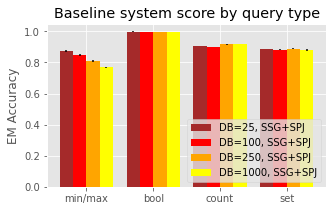

In [100]:

plt.style.use('ggplot')

labels = ['min/max','min/max_complex', 'bool', 'bool_complex', 'count', 'count_complex', 'set', 'set_complex']
labels = ['min/max', 'bool', 'count', 'set']
plt.rcParams["figure.figsize"] = (5,3)
scores = []
for system in systems:
    score = []
    for label in labels:
        score.append(all_system_type[system][label])

    scores.append(score)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ptr = -1*len(systems)*width/2+width

colors = ["brown","red","orange","yellow"]

for color, score, system in zip(colors,scores,systems):
    print(system, [np.mean(s) for s in score], [np.std(s) for s in score])
    rects1 = ax.bar(x + ptr, [np.mean(s) for s in score], width, color=color, yerr=[np.std(s) for s in score], label=system)
    ptr += width
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EM Accuracy')
ax.set_title('Baseline system score by query type')
plt.xticks(x,rotation=0)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.savefig("baseline_type.pdf")

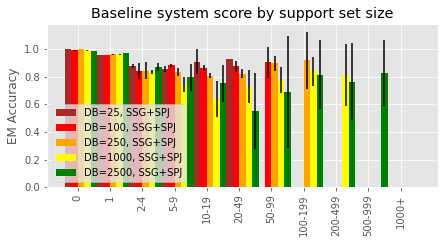

In [101]:
all_system_bins = defaultdict(lambda: defaultdict(list))

ranges = [0,1,2,5,10,20,50,100,200,500,1000]
labels = ["0","1","2-4","5-9","10-19","20-49","50-99","100-199","200-499","500-999","1000+"]
s_bins = []
mapping = dict()
for idx,r in enumerate(ranges[:-1]):
    s_bins.append((ranges[idx],ranges[idx+1]))
    for i in range(ranges[idx],ranges[idx+1]):
        mapping[i] = s_bins[-1]
s_bins.append(1000)

for i in range(s_bins[-1],10000):
    mapping[i] = s_bins[-1]

for system in all_system_size:
    for size, res in all_system_size[system].items():
        all_system_bins[system][mapping[int(size)]].extend(res)
    

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (7,3)
scores = []
for system in systems:
    score = []
    for sbin in s_bins:
        local = []
        score.append(all_system_bins[system][sbin])

    scores.append(score)
    
width = 0.2  # the width of the bars
x = np.arange(len(labels))
fig, ax = plt.subplots()
ptr = -1*len(systems)*width/2+width

colors = ["brown","red","orange","yellow","green"]

for color, score, system in zip(colors,scores,systems):
    xplt = [np.mean(s) if len(s) else 0 for s in score]
    yerr = [np.std(s) if len(s) else 0 for s in score]

    
    rects1 = ax.bar(x + ptr, xplt, width, color=color, yerr=yerr, label=system)
    ptr += width
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EM Accuracy')
ax.set_title('Baseline system score by support set size')
plt.xticks(x,rotation=0)
ax.set_xticklabels(labels,rotation=90)
ax.legend(loc='lower left')
plt.savefig("baseline_size.pdf")

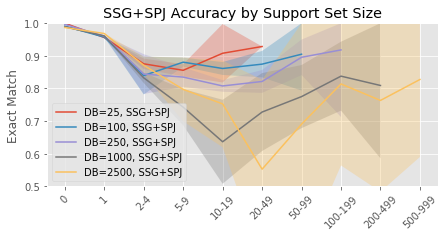

In [112]:
all_system_bins = defaultdict(lambda: defaultdict(list))

ranges = [0,1,2,5,10,20,50,100,200,500,1000]
labels = ["0","1","2-4","5-9","10-19","20-49","50-99","100-199","200-499","500-999","1000+"]
s_bins = []
mapping = dict()
for idx,r in enumerate(ranges[:-1]):
    s_bins.append((ranges[idx],ranges[idx+1]))
    for i in range(ranges[idx],ranges[idx+1]):
        mapping[i] = s_bins[-1]
s_bins.append(1000)

for i in range(s_bins[-1],10000):
    mapping[i] = s_bins[-1]

for system in all_system_size:
    for size, res in all_system_size[system].items():
        all_system_bins[system][mapping[int(size)]].extend(res)
    

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (7,3)
scores = []
for system in systems:
    score = []
    for sbin in s_bins:
        local = []
        score.append(all_system_bins[system][sbin])

    scores.append(score)
    
width = 0.2  # the width of the bars
x = np.arange(len(labels))

#colors = ["brown","red","orange","gold","olive"]

for color, score, system in zip(colors,scores,systems):
    xplt = [np.mean(s) if len(s) else 0 for s in score if len(s)]
    yerr1 = [min(1,np.mean(s) + np.std(s)) if len(s) else 0 for s in score if len(s)]
    yerr2 = [max(0, np.mean(s) - np.std(s)) if len(s) else 0 for s in score if len(s)]

    plt.plot(labels[:len(xplt)],xplt)
    plt.fill_between(labels[:len(xplt)],yerr1,yerr2, alpha=0.3)
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EM Accuracy')
ax.set_title('Baseline system score by support set size')
plt.xticks(labels[:len(xplt)],rotation=45)
plt.ylim((0.5,1.0))
plt.legend(systems,loc='lower left')
plt.title("SSG+SPJ Accuracy by Support Set Size")

plt.ylabel("Exact Match")
plt.savefig("by_size.pdf")